In this notebook, we crudely imlement the Markowitz (Modern Portfolio Theory) Model in which we try to maximize the Sharpe ratio for a given distribution of stocks in a portfolio.

In [3]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

### Define stocks to include within portfolio

In [4]:
STOCKS = ["AAPL", "WMT", "TSLA", "GE", "AMZN", "DB"]
start_date = "2010-01-01"
end_date = "2023-01-01"
NUM_TRADING_DAYS = 252  # Guesstimation for number of trading days per year

### Fetch Yahoo finance data for given stocks

In [5]:
data = {}
for s in STOCKS:
    ticker = yf.Ticker(s)
    data[s] = ticker.history(start=start_date, end=end_date)["Close"]
stock_data = pd.DataFrame(data)

<Axes: xlabel='Date'>

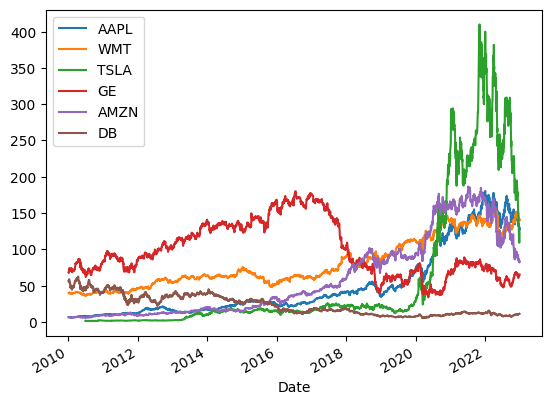

In [6]:
stock_data.plot()

### Use historical data to caluclate daily returns at close

In [7]:
log_daily_returns = np.log(stock_data / stock_data.shift(1))[1:]

annual_mean = log_daily_returns.mean() * NUM_TRADING_DAYS
annual_cov = log_daily_returns.cov() * NUM_TRADING_DAYS
display(annual_mean)
display(annual_cov)

AAPL    0.230572
WMT     0.096860
TSLA    0.347969
GE     -0.003216
AMZN    0.194871
DB     -0.124257
dtype: float64

,AAPL,WMT,TSLA,GE,AMZN,DB
AAPL,0.082561,0.017116,0.058258,0.032600,0.046567,0.041971
WMT,0.017116,0.038134,0.016146,0.013791,0.016086,0.017911
TSLA,0.058258,0.016146,0.324132,0.042021,0.066802,0.059004
GE,0.032600,0.013791,0.042021,0.102065,0.029057,0.067230
AMZN,0.046567,0.016086,0.066802,0.029057,0.108637,0.043401
DB,0.041971,0.017911,0.059004,0.067230,0.043401,0.176528


Given a distribution of stocks within a portfolio, calculate the expected return and volatility

In [8]:
def portfolio_statistics(returns, weights):
    # Weighted sum of expectation for each stock
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    # w_transpose * Sigma * w
    portfolio_variance = np.sqrt(
        np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights))
    )
    return portfolio_return, portfolio_variance

In [9]:
weights = np.array([0.2, 0, 0.3, 0.25, 0.25, 0])
portfolio_statistics(log_daily_returns, weights)

(0.19841895986593322, 0.28373671377565074)

### Generate random portfolio distributions

In [10]:
def generate_portfolios(returns, num_portfolios):
    means = []
    sigmas = []
    weights = []

    for _ in range(num_portfolios):
        w = np.random.random(len(STOCKS))
        w /= sum(w)  # normalise
        weights.append(w)
        mu, sigma = portfolio_statistics(returns, w)
        means.append(mu)
        sigmas.append(sigma)
    return np.array(means), np.array(sigmas), np.array(weights)

In [11]:
means, sigmas, weights = generate_portfolios(log_daily_returns, 10000)

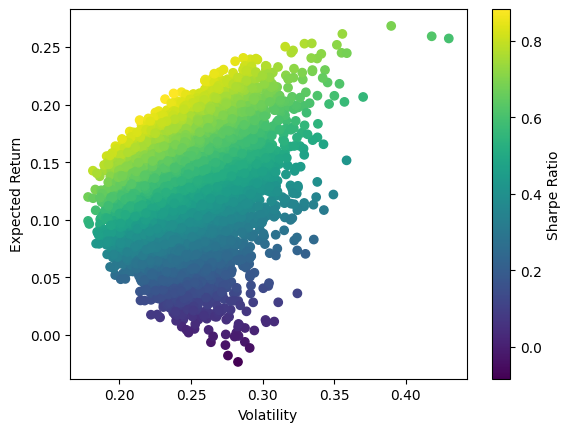

In [12]:
plt.scatter(sigmas, means, c=means / sigmas)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharpe Ratio")

### Find the highest Sharpe ratio for generated portfolios

In [22]:
max_idx = np.argmax(means / sigmas)
print(means[max_idx], sigmas[max_idx])
print(weights[max_idx])

0.20469639503469078 0.23184183771704026
[0.28078485 0.25162695 0.16787085 0.00428324 0.29421548 0.00121863]


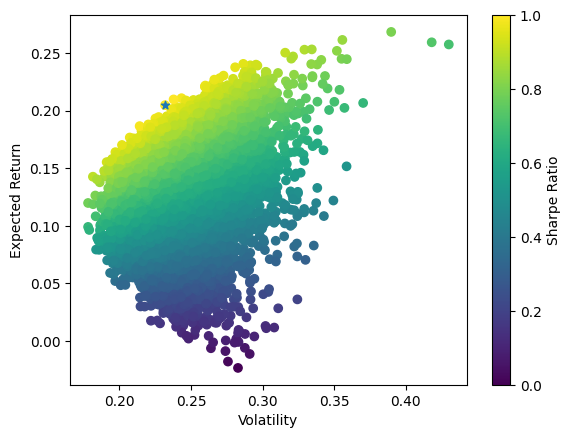

In [27]:
plt.scatter(sigmas, means, c=means / sigmas)
plt.scatter(sigmas[max_idx], means[max_idx], marker="*")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.colorbar(label="Sharpe Ratio")